# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score

from dt import DecisionTreeClassifier

In [2]:
# Veri setini yükleme
data = pd.read_csv('iris.csv')

# Veri setinin başlığını kontrol etme
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Tür adlarını tam sayılara dönüştürme
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Sonuçları kontrol etme
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [4]:
# Veri setinin özeti
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000       1.600000      0.300000   
50%     75.500000       5.800000      3.000000       4.350000      1.300000   
75%    112.750000       6.400000      3.300000       5.100000      1.800000   
max    150.000000       7.900000      4.400000       6.900000      2.500000   

          Species  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000  


In [5]:
# Veri setinin karıştırılması
data = shuffle(data)
print(data.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
107  108            7.3           2.9            6.3           1.8        2
101  102            5.8           2.7            5.1           1.9        2
59    60            5.2           2.7            3.9           1.4        1
126  127            6.2           2.8            4.8           1.8        2
44    45            5.1           3.8            1.9           0.4        0


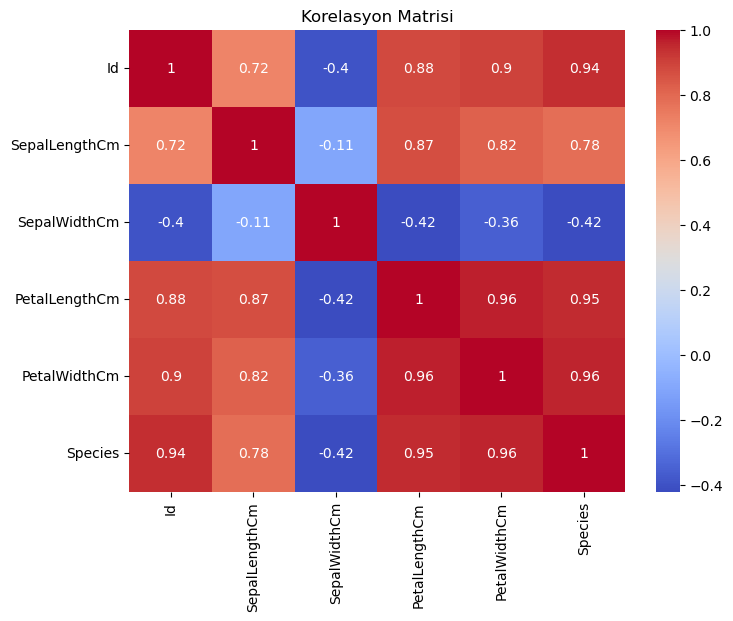

In [6]:
# Korelasyon matrisi
correlation_matrix = data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

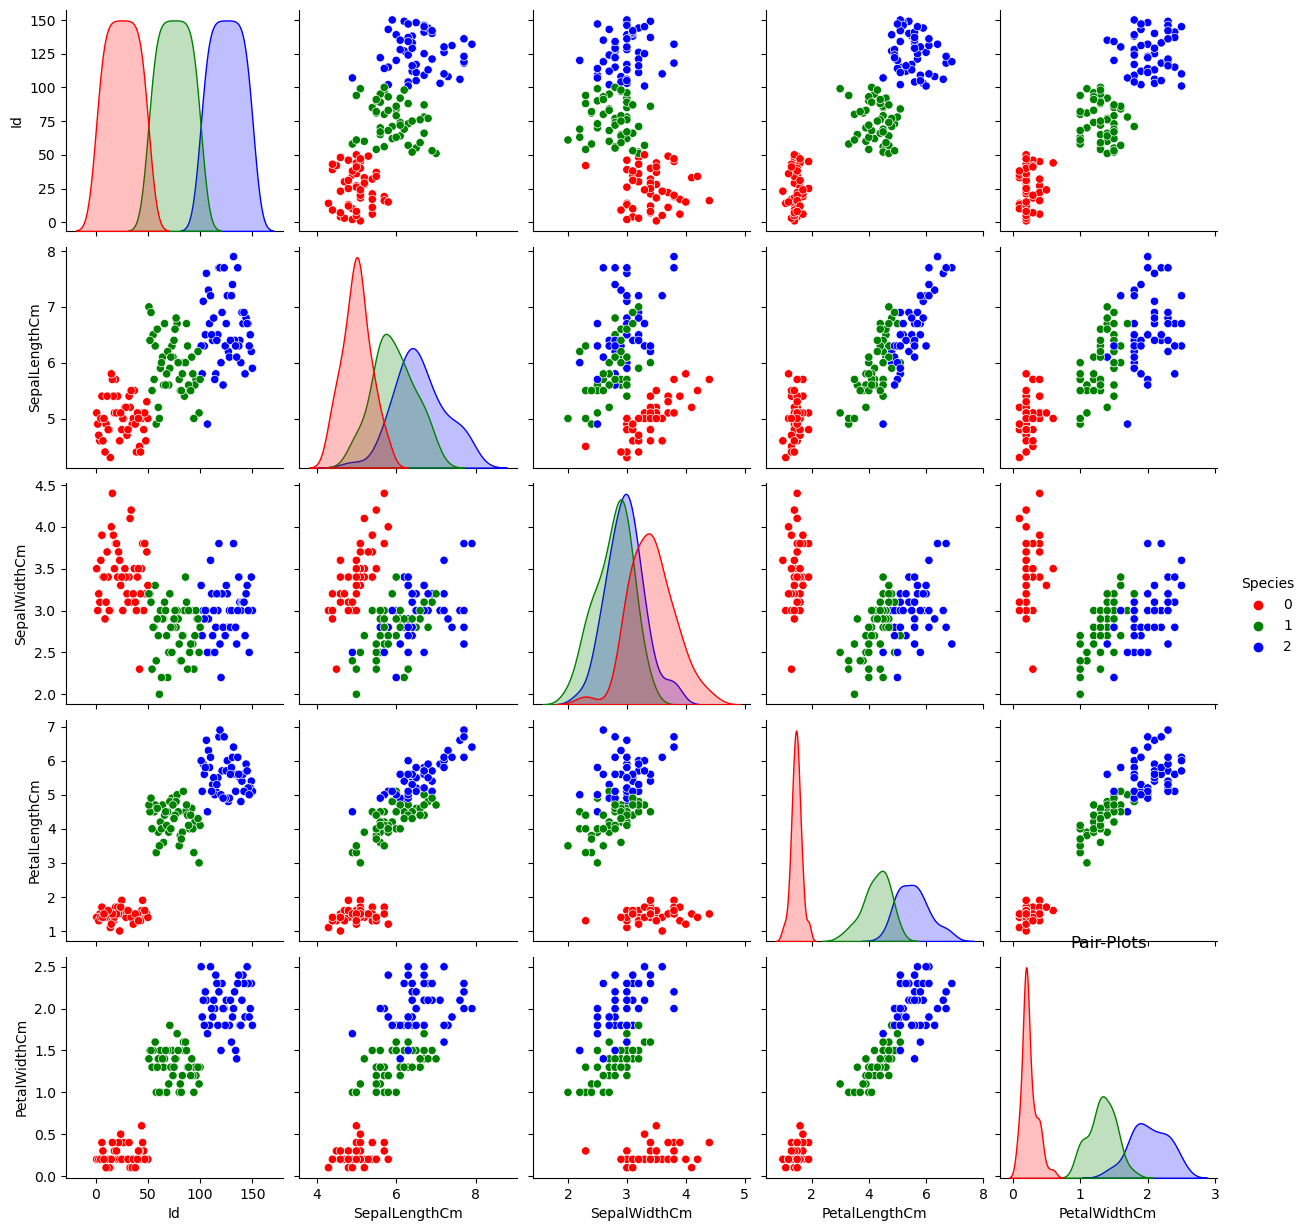

In [7]:
# Öznitelikler için pair-plots
custom_palette = ['red', 'green', 'blue']
sns.pairplot(data, hue='Species', palette=custom_palette)
plt.title('Pair-Plots')
plt.show()

### Veriyi eğitim ve test setlerine ayırma

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### DecisionTreeClassifier'ı eğitme

In [9]:
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train.tolist(), y_train.tolist())

### Test seti üzerinde sınıflandırma

In [10]:
predictions = classifier.predict(X_test.tolist())

# Sonuçları değerlendirme

In [11]:
accuracy = sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


### Confusion Matrix

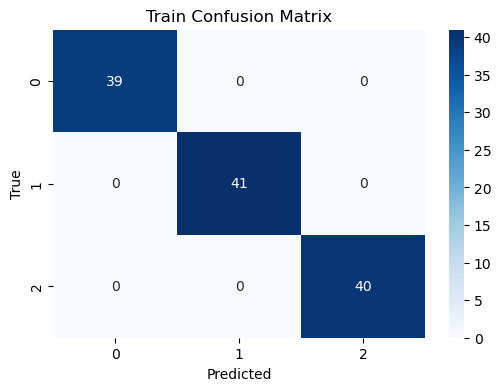

In [12]:
# Training set evaluation
train_predictions = classifier.predict(X_train.tolist())
train_confusion_matrix = confusion_matrix(y_train.tolist(), train_predictions)
plt.figure(figsize=(6, 4))
plt.title('Train Confusion Matrix')
sns.heatmap(train_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

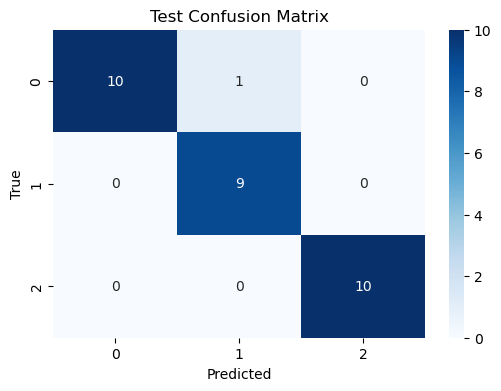

In [13]:
# Test set evaluation
test_predictions = classifier.predict(X_test.tolist())
test_confusion_matrix = confusion_matrix(y_test.tolist(), test_predictions)
plt.figure(figsize=(6, 4))
plt.title('Test Confusion Matrix')
sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
# Accuracy
train_accuracy = np.mean(train_predictions == y_train) * 100
test_accuracy = np.mean(test_predictions == y_test) * 100
print("\nAccuracy (Train set):", train_accuracy)
print("Accuracy (Test set):", test_accuracy)

# F1-Score
train_f1_score = classification_report(y_train, train_predictions, output_dict=True)['weighted avg']['f1-score']
test_f1_score = classification_report(y_test, test_predictions, output_dict=True)['weighted avg']['f1-score']
print("\nF1-Score (Train set):", train_f1_score)
print("F1-Score (Test set):", test_f1_score)

# Precision
train_precision = classification_report(y_train, train_predictions, output_dict=True)['weighted avg']['precision']
test_precision = classification_report(y_test, test_predictions, output_dict=True)['weighted avg']['precision']
print("\nPrecision (Train set):", train_precision)
print("Precision (Test set):", test_precision)

# Recall
train_recall = classification_report(y_train, train_predictions, output_dict=True)['weighted avg']['recall']
test_recall = classification_report(y_test, test_predictions, output_dict=True)['weighted avg']['recall']
print("\nRecall (Train set):", train_recall)
print("Recall (Test set):", test_recall)


Accuracy (Train set): 100.0
Accuracy (Test set): 96.66666666666667

F1-Score (Train set): 1.0
F1-Score (Test set): 0.966750208855472

Precision (Train set): 1.0
Precision (Test set): 0.9700000000000001

Recall (Train set): 1.0
Recall (Test set): 0.9666666666666667


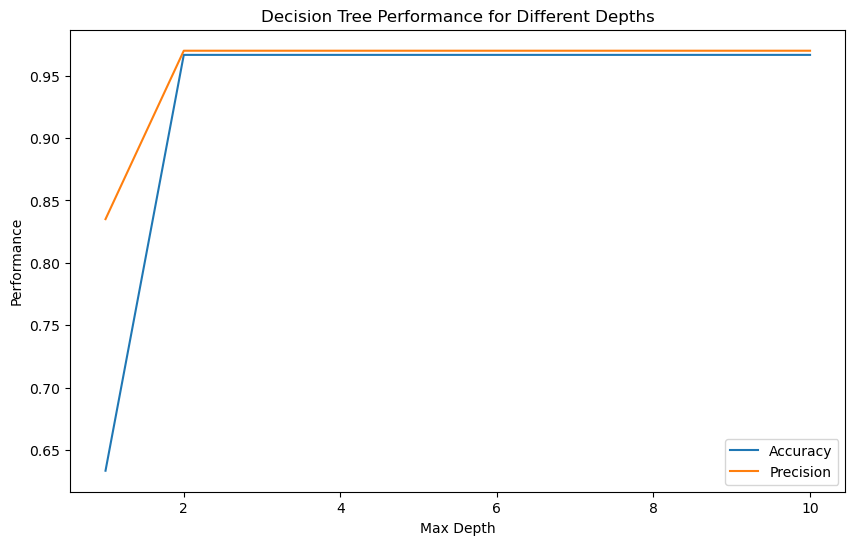

Best Depth: 2
Best Accuracy: 0.9666666666666667
Corresponding Precision: 0.9700000000000001


In [15]:
L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracies = []
precisions = []

for depth in L:
    # DecisionTreeClassifier'ı eğitme
    classifier = DecisionTreeClassifier(max_depth=depth)
    classifier.fit(X_train.tolist(), y_train.tolist())

    # Test seti üzerinde sınıflandırma
    predictions = classifier.predict(X_test.tolist())

    # Accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    # Precision
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
    precisions.append(precision)

plt.figure(figsize=(10, 6))
plt.plot(L, accuracies, label='Accuracy')
plt.plot(L, precisions, label='Precision')
plt.xlabel('Max Depth')
plt.ylabel('Performance')
plt.title('Decision Tree Performance for Different Depths')
plt.legend()
plt.show()

best_accuracy = max(accuracies)
best_accuracy_index = accuracies.index(best_accuracy)
best_precision = precisions[best_accuracy_index]
best_depth = L[best_accuracy_index]

print("Best Depth:", best_depth)
print("Best Accuracy:", best_accuracy)
print("Corresponding Precision:", best_precision)